In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [3]:
print("First 5 Rows:\n")
print(df.head().to_string())

First 5 Rows:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species
0                5.1               3.5                1.4               0.2        0
1                4.9               3.0                1.4               0.2        0
2                4.7               3.2                1.3               0.2        0
3                4.6               3.1                1.5               0.2        0
4                5.0               3.6                1.4               0.2        0


In [4]:
X = df.drop('species', axis=1)
y = df['species']

In [19]:
df.isna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [20]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [6]:
print("X Shape:", X.shape)
print("y Shape:", y.shape)

X Shape: (150, 4)
y Shape: (150,)


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Training Samples: 120
Testing Samples: 30


In [9]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print(f"KNN Model Trained with k = {k}")

KNN Model Trained with k = 5


In [10]:
y_pred = knn.predict(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
k_values = range(1, 15)
accuracies = []

In [14]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

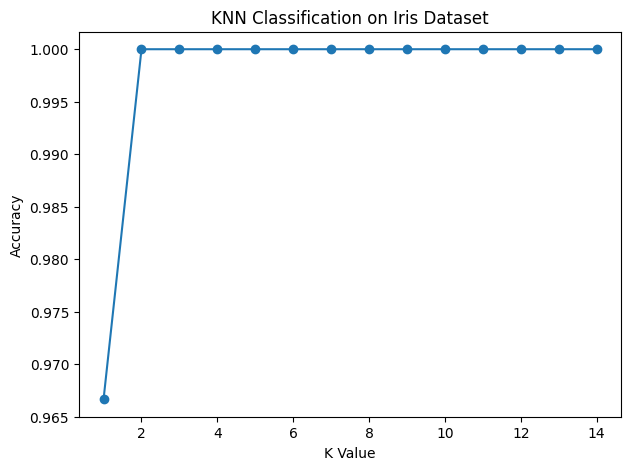

In [15]:
plt.figure(figsize=(7,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Classification on Iris Dataset")
plt.show()

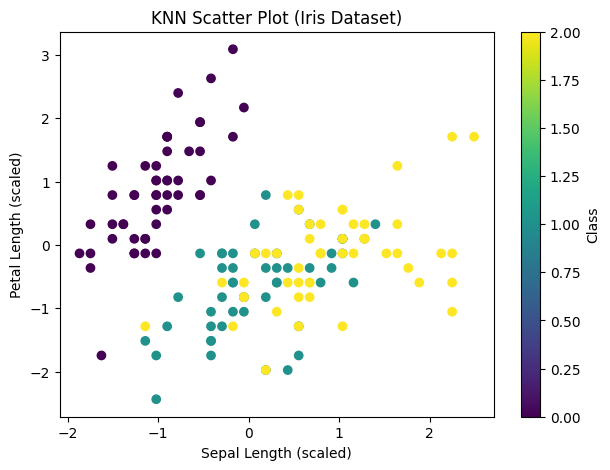

In [22]:
# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=y,
    cmap="viridis"
)

plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Petal Length (scaled)")
plt.title("KNN Scatter Plot (Iris Dataset)")
plt.colorbar(label="Class")
plt.show()


In [17]:
# Proper new sample with feature names
new_flower = pd.DataFrame(
    [[5.1, 3.5, 1.4, 0.2]],
    columns=X.columns
)

# Scale using the same scaler
new_flower_scaled = scaler.transform(new_flower)

# Predict
predicted_class = knn.predict(new_flower_scaled)

print("Predicted Class:", predicted_class[0])


Predicted Class: 0
